## Готовим данные

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('02_titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df = df.drop(['Cabin', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [6]:
df = df[~df['Age'].isnull()]

In [7]:
df.shape

(714, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [9]:
y = df['Survived']

## А где же машинное обучение?

In [10]:
from sklearn.linear_model import LogisticRegression  # импортируем модель машинного обучения
model = LogisticRegression()                         # инициализируем модель
model.fit(df, y)                                     # обучаем модель
predict = model.predict(df)                          # делаем предсказание

In [11]:
predict

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [12]:
# Но как сравнить? Как понять хорошо мы отработали или не очень?

In [13]:
list(zip(y, predict)) # сравним глазами

[(0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 

In [14]:
# Посчитаем сколько ответов отличается

In [15]:
sum(abs(y - predict))  # классная модель! все верно предсказывает!

0

In [16]:
# На самом деле у нас проблемы, Хьюстон!

# 1. а давайте посмотрим данные на которых обучаем

df.head().T

,0,1,2,3,4
PassengerId,1.00,2.0000,3.000,4.0,5.00
Survived,0.00,1.0000,1.000,1.0,0.00
Pclass,3.00,1.0000,3.000,1.0,3.00
Age,22.00,38.0000,26.000,35.0,35.00
SibSp,1.00,1.0000,0.000,1.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05


In [17]:
# Есть колонка Survived (не опечатка, действительно колонка, я ж транспонировал выше)
# Это ж ответы
# 
# А какой код предсказания?
#
### model.predict(df)    
#
# Т.е. мы делаем предсказания передавая ответы?
# Это неверно =) Если есть ответы то делать предсказания и не надо.
# Нам же нужно смоделировать ситуацию когда ответы мы не знаем, для этого нужно их удалит
df = df.drop('Survived', axis=1)

In [18]:
# Повторяем код обучения и предсказывания
model = LogisticRegression()                     # инициализируем модель
model.fit(df, y)                                 # обучаем модель
predict = model.predict(df)                      # делаем предсказание

In [19]:
sum(abs(y - predict))  # классная модель! все верно предсказывает!

205

In [20]:
# Вот, уже похоже на правду, есть 205 отличий предсказаного от реального
# Но есть ли способ посчитать симпотичнее? И вообще как сравнивать разные черные ящики
# Метрики!!!

![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png)

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [22]:
precision_score(y, predict)

0.7073170731707317

In [23]:
recall_score(y, predict)

0.5

In [24]:
accuracy_score(y, predict)

0.7128851540616247

In [25]:
print(classification_report(y, predict))

             precision    recall  f1-score   support

          0       0.72      0.86      0.78       424
          1       0.71      0.50      0.59       290

avg / total       0.71      0.71      0.70       714



In [26]:
# Ок. но кажется мы еще кое что делаем неверно
# На чем мы обучаемся на том и делаем предсказания
# В реальной жизни мы будем же делать предсказания для тех, для кого не знаем реальные значения
# Смоделируем реальную жизнь

In [27]:
from sklearn.model_selection import train_test_split

![Image](http://scott.fortmann-roe.com/docs/docs/MeasuringError/holdout.png)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [29]:
# Повторяем код обучения и предсказывания, но обучаем на одном куске, а предсказываем на другом
model = LogisticRegression()                     # инициализируем модель
model.fit(X_train, y_train)                      # обучаем модель
predict = model.predict(X_test)                      # делаем предсказание

In [30]:
from sklearn.metrics import accuracy_score, f1_score

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.7454545454545455
recall 0.41414141414141414
accuracy 0.6949152542372882
f1 0.5324675324675325


In [31]:
# Попробуем другой черный ящик, Сегодня не вникаем что внутри ящика, об этом узнаем позже

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.6351351351351351
recall 0.47474747474747475
accuracy 0.6652542372881356
f1 0.5433526011560694


In [32]:
# А еще можно менять не черные ящики, 
# а менять какие-то параметры у этих черных ящиков, тоже узнаем что за этим скрывается в следующих лекциях
# Пока это "ниточки" за которые "можно дергать" =)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.7142857142857143
recall 0.5555555555555556
accuracy 0.7203389830508474
f1 0.6250000000000001


In [33]:
# а еще модель умеет давать вероятность
predict_proba = model.predict_proba(X_test)

In [34]:
predict_proba[:,1]

array([0.469, 0.962, 0.466, 0.708, 0.051, 0.801, 0.243, 0.443, 0.286,
       0.076, 0.486, 0.344, 0.779, 0.086, 0.863, 0.486, 0.292, 0.715,
       0.471, 0.552, 0.155, 0.35 , 0.86 , 0.876, 0.215, 0.581, 0.666,
       0.369, 0.654, 0.086, 0.127, 0.466, 0.736, 0.033, 0.121, 0.089,
       0.365, 0.256, 0.054, 0.191, 0.612, 0.09 , 0.871, 0.289, 0.753,
       0.156, 0.431, 0.302, 0.283, 0.458, 0.664, 0.212, 0.743, 0.281,
       0.173, 0.231, 0.612, 0.363, 0.056, 0.303, 0.237, 0.13 , 0.29 ,
       0.227, 0.144, 0.585, 0.822, 0.729, 0.049, 0.222, 0.15 , 0.515,
       0.354, 0.117, 0.122, 0.116, 0.145, 0.115, 0.029, 0.843, 0.087,
       0.766, 0.194, 0.4  , 0.009, 0.061, 0.094, 0.161, 0.16 , 0.292,
       0.238, 0.878, 0.521, 0.158, 0.383, 0.349, 0.689, 0.893, 0.712,
       0.234, 0.686, 0.36 , 0.111, 0.34 , 0.843, 0.39 , 0.076, 0.827,
       0.565, 0.214, 0.682, 0.123, 0.379, 0.247, 0.234, 0.493, 0.395,
       0.664, 0.318, 0.021, 0.545, 0.14 , 0.21 , 0.284, 0.822, 0.058,
       0.227, 0.438,

(-0.01, 1.01)

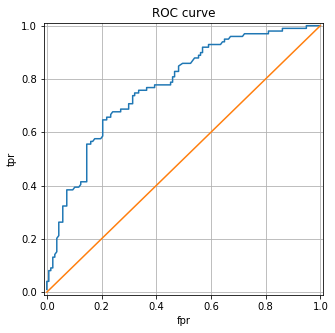

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [36]:
roc_auc_score(y_test, predict_proba[:,1])

0.7732065177320652

![Image](http://s5047.pcdn.co/wp-content/uploads/2015/06/07_cross_validation_diagram.png)

In [37]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.65717723, 0.56816359, 0.63993585, 0.65677626, 0.70812808,
       0.73234811, 0.75328407, 0.74917898, 0.79351396, 0.80295567])

In [38]:
# Окей мы теперь знаем, что можно влиять на
# 1) выбор черного ящика
# 2) параметры черного ящика

## Вернемся к данным

In [39]:
df = pd.read_csv('02_titanic_train.csv')

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [42]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [43]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [44]:
# Закодируем пол и порт посадки с помощью OneHotEncoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [45]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [47]:
# Заполним пропуски в данных самым простым сподходящим пособом: медианой
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].median()

In [48]:
# Проверяем что все численно
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [49]:
dtc = RandomForestClassifier(n_estimators=1000)
cross_val_score(
    dtc,
    df.drop('Survived', axis=1),
    df['Survived'],
    scoring='roc_auc',
    cv=10
)

array([0.79220779, 0.86181818, 0.7802139 , 0.90053476, 0.92513369,
       0.87754011, 0.85614973, 0.83074866, 0.89652406, 0.89869281])